In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pvaG5jaGVuL0RvY3VtZW50cy9Tb2x1dGlvbnMvY291cnNlLXdlYnNpdGUvc2xpZGVzLzEw'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
#| label: setup

# Data Handling and Manipulation
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

# Machine Learning Models
from sklearn.svm import SVC  # Support Vector Classifier for classification tasks
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression  # For polynomial regression

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Additional Tools
from skopt.plots import plot_convergence, plot_objective, plot_evaluations
from sklearn.metrics import accuracy_score, make_scorer

# Set the default style for visualization
sns.set_theme(style = "white", palette = "colorblind")

# Increase font size of all Seaborn plot elements
sns.set(font_scale = 1.25)

In [3]:
laborDiscrim = pd.read_csv("data/labor_market_discrimination.csv", encoding = 'iso-8859-1')[["education", "special_skills", "computer_skills", "honors", "sex", "race", "call"]]
laborDiscrim.head()

,education,special_skills,computer_skills,honors,sex,race,call
0,4,0,1,0,f,w,0
1,3,0,1,0,f,w,0
2,4,0,1,0,f,b,0
3,3,1,1,0,f,b,0
4,3,0,1,0,f,w,0


In [4]:
laborDiscrim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   education        4870 non-null   int64 
 1   special_skills   4870 non-null   int64 
 2   computer_skills  4870 non-null   int64 
 3   honors           4870 non-null   int64 
 4   sex              4870 non-null   object
 5   race             4870 non-null   object
 6   call             4870 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 266.5+ KB


In [5]:
#| code-fold: true
# Select categorical columns
categorical_cols = laborDiscrim.columns

# Initialize a dictionary to store results
category_analysis = {}

# Loop through each categorical column
for col in categorical_cols:
    counts = laborDiscrim[col].value_counts()
    proportions = laborDiscrim[col].value_counts(normalize=True)
    unique_levels = laborDiscrim[col].unique()
    
    # Store results in dictionary
    category_analysis[col] = {
        'Unique Levels': unique_levels,
        'Counts': counts,
        'Proportions': proportions
    }

# Print results
for col, data in category_analysis.items():
    print(f"Analysis for {col}:\n")
    print("Unique Levels:", data['Unique Levels'])
    print("\nCounts:\n", data['Counts'])
    print("\nProportions:\n", data['Proportions'])
    print("\n" + "-"*50 + "\n")

Analysis for education:

Unique Levels: [4 3 1 2 0]

Counts:
 education
4    3504
3    1006
2     274
0      46
1      40
Name: count, dtype: int64

Proportions:
 education
4    0.719507
3    0.206571
2    0.056263
0    0.009446
1    0.008214
Name: proportion, dtype: float64

--------------------------------------------------

Analysis for special_skills:

Unique Levels: [0 1]

Counts:
 special_skills
0    3269
1    1601
Name: count, dtype: int64

Proportions:
 special_skills
0    0.671253
1    0.328747
Name: proportion, dtype: float64

--------------------------------------------------

Analysis for computer_skills:

Unique Levels: [1 0]

Counts:
 computer_skills
1    3996
0     874
Name: count, dtype: int64

Proportions:
 computer_skills
1    0.820534
0    0.179466
Name: proportion, dtype: float64

--------------------------------------------------

Analysis for honors:

Unique Levels: [0 1]

Counts:
 honors
0    4613
1     257
Name: count, dtype: int64

Proportions:
 honors
0    0.9

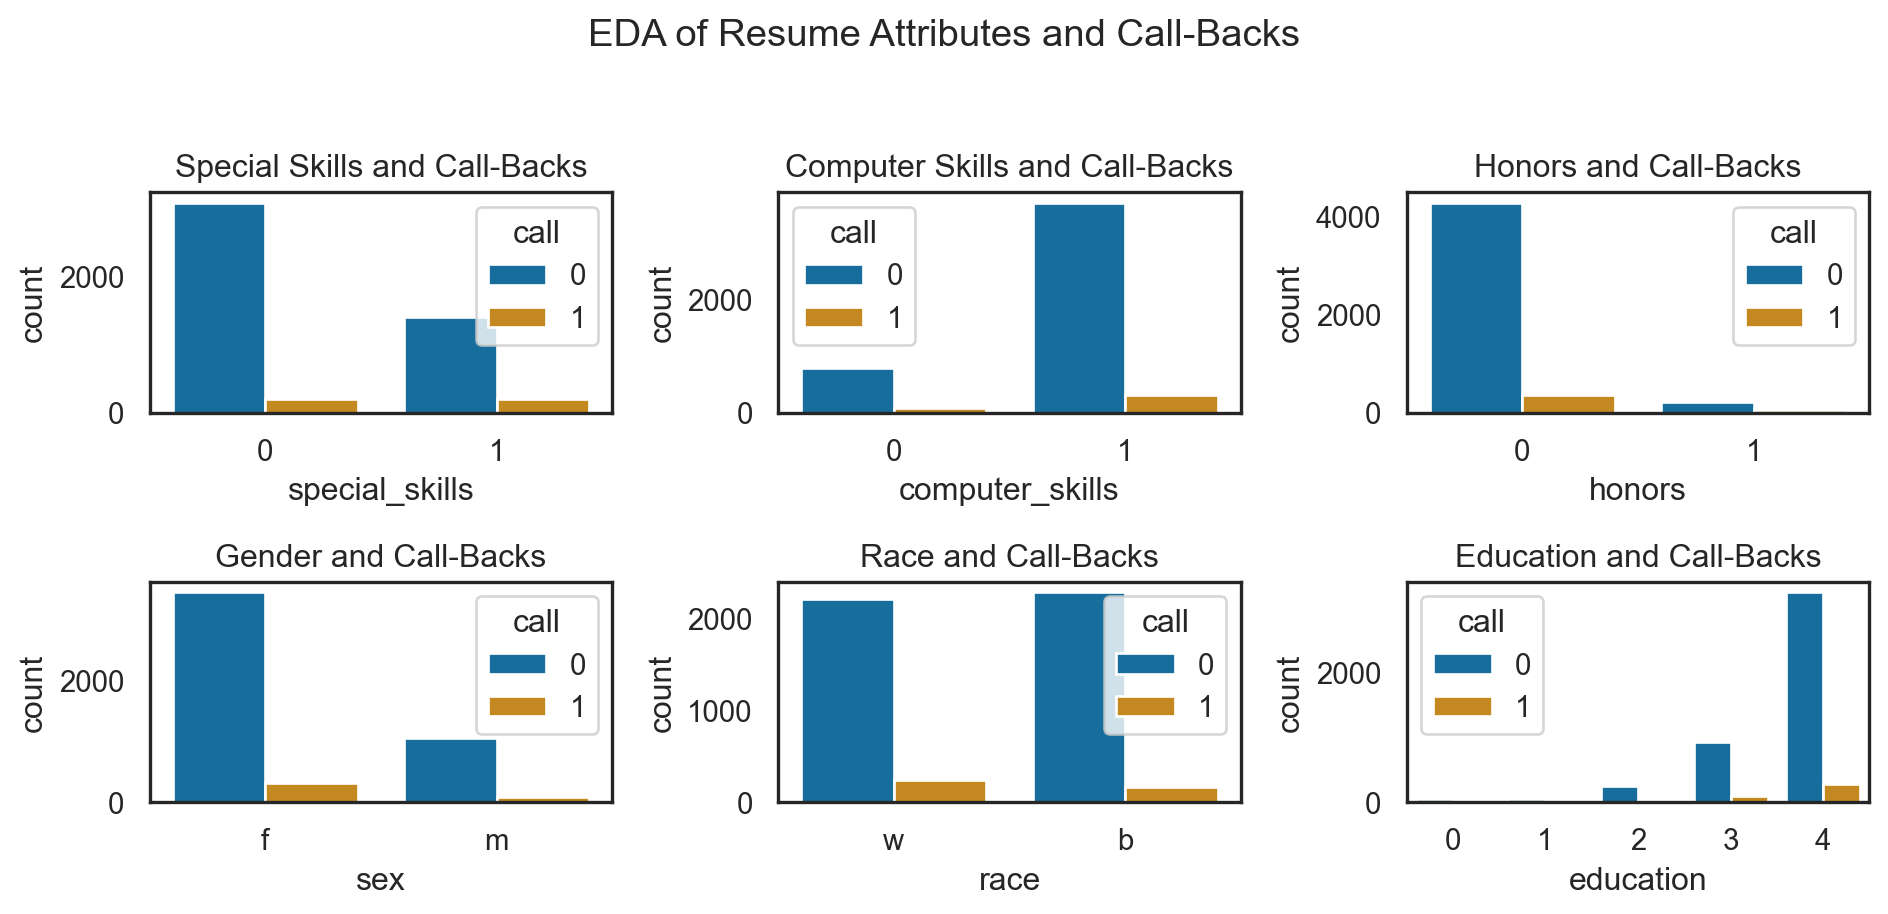

In [6]:
#| echo: false
sns.set_theme(style = "white", palette = "colorblind")

# Set data
df = laborDiscrim

# Plotting
fig, axes = plt.subplots(2, 3)
fig.suptitle('EDA of Resume Attributes and Call-Backs')

sns.countplot(ax=axes[0, 0], data=df, x='special_skills', hue='call').set_title('Special Skills and Call-Backs')
sns.countplot(ax=axes[0, 1], data=df, x='computer_skills', hue='call').set_title('Computer Skills and Call-Backs')
sns.countplot(ax=axes[0, 2], data=df, x='honors', hue='call').set_title('Honors and Call-Backs')
sns.countplot(ax=axes[1, 0], data=df, x='sex', hue='call').set_title('Gender and Call-Backs')
sns.countplot(ax=axes[1, 1], data=df, x='race', hue='call').set_title('Race and Call-Backs')
sns.countplot(ax=axes[1, 2], data=df, x='education', hue='call').set_title('Education and Call-Backs')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()

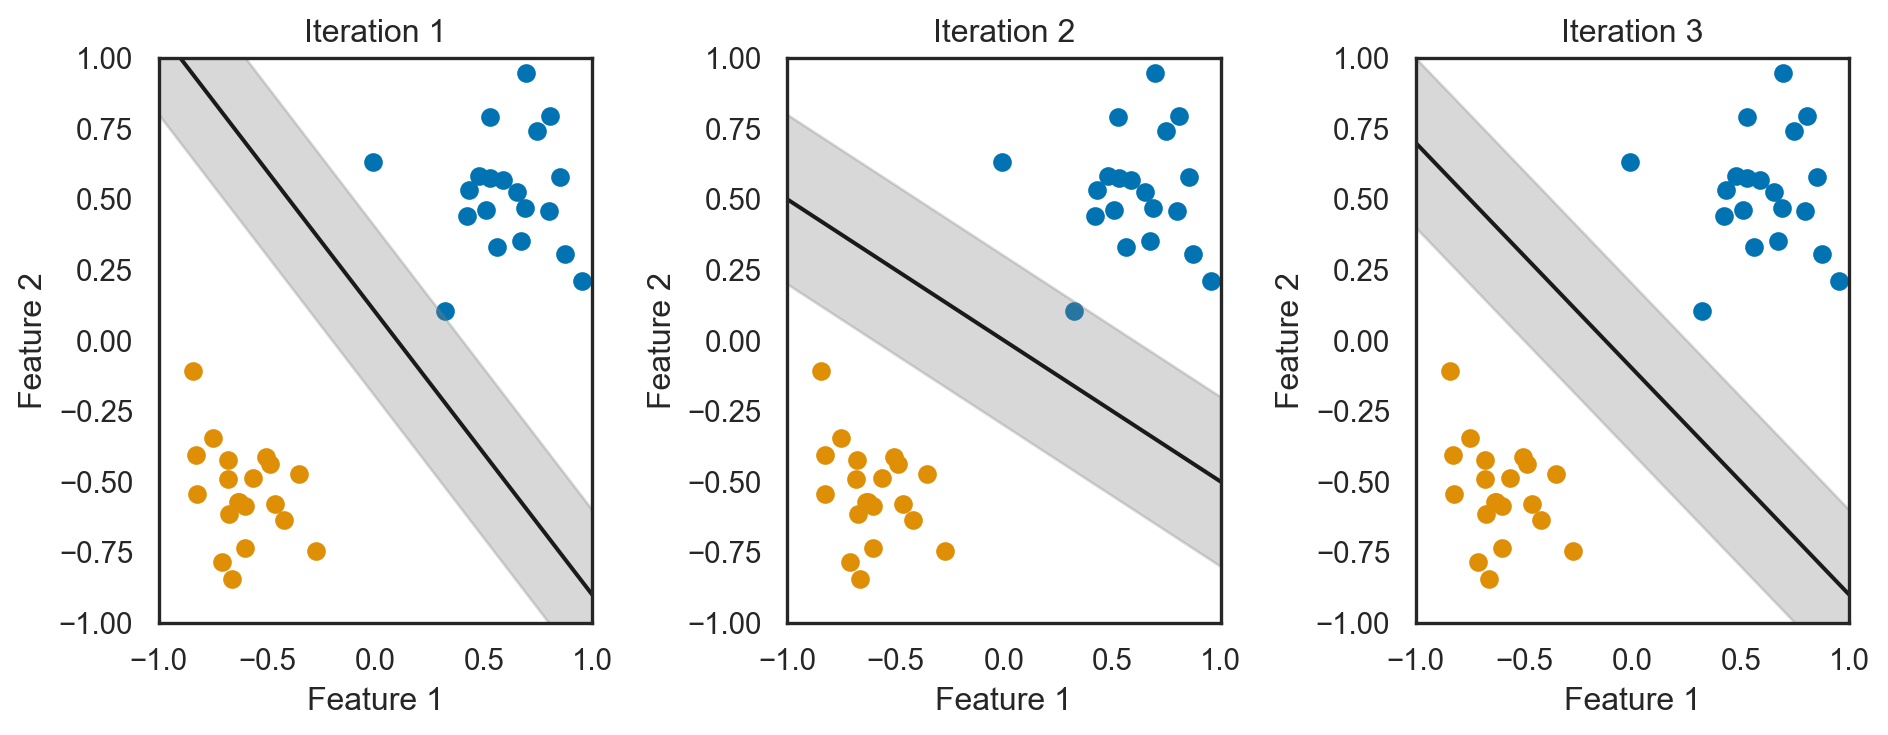

In [7]:
#| echo: false
import matplotlib.pyplot as plt
import numpy as np

# Let's create a function to plot a series of subplots showing iterations of a margin classifier

def plot_margin_classifier_iterations():
    # Generate synthetic data for two classes
    np.random.seed(0)
    x1 = np.random.normal(0.5, 0.2, (20, 2))
    x2 = np.random.normal(-0.5, 0.2, (20, 2))
    
    # Define hyperplane parameters (slope and intercept) for 3 iterations
    slopes = [-1, -0.5, -0.8]
    intercepts = [0.1, 0, -0.1]
    
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    
    # Iterate through subplots, hyperplane parameters and plot
    for i, (slope, intercept) in enumerate(zip(slopes, intercepts)):
        # Plot points
        axes[i].scatter(x1[:, 0], x1[:, 1])
        axes[i].scatter(x2[:, 0], x2[:, 1])
        
        # Create hyperplane line
        x_values = np.linspace(-1, 1, 100)
        y_values = slope * x_values + intercept
        
        # Plot hyperplane
        axes[i].plot(x_values, y_values, 'k')
        
        # Fill the margin
        margin = 0.3  # Just an example margin size
        axes[i].fill_between(x_values, y_values - margin, y_values + margin, color='gray', alpha=0.3)
        
        # Setting limits for better visualization
        axes[i].set_xlim(-1, 1)
        axes[i].set_ylim(-1, 1)
        
        # Titles and labels
        axes[i].set_title(f'Iteration {i+1}')
        axes[i].set_xlabel('Feature 1')
        axes[i].set_ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

plot_margin_classifier_iterations()

In [8]:
# Selecting columns
X = laborDiscrim[['education', 'special_skills', 'computer_skills', 'honors', 'sex', 'race']]
y = laborDiscrim['call']

# Define categorical and numerical features
categorical_features = ['sex', 'race']  # Add other categorical feature names as needed
numerical_features = ['education', 'special_skills', 'computer_skills', 'honors']  # Add other numerical feature names as needed

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [9]:
#| code-fold: true
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Define the full pipeline
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc', SVC())
])

# Create a custom scorer for cross-validation
accuracy_scorer = make_scorer(accuracy_score)

# Training the SVM model
svm_pipeline.fit(X_train, y_train)

# Predicting the test set results
y_pred = svm_pipeline.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[910   0]
 [ 64   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       910
           1       0.00      0.00      0.00        64

    accuracy                           0.93       974
   macro avg       0.47      0.50      0.48       974
weighted avg       0.87      0.93      0.90       974



/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

In [10]:
#| echo: false
X = laborDiscrim[['education', 'special_skills', 'computer_skills', 'honors', 'sex', 'race']]
y = laborDiscrim['call']

# Preprocessing for categorical data: One-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

In [11]:
#| code-fold: true
#| eval: false
# Defining the parameter grid for Random Search
param_grid = {
    'svc__C': np.logspace(-4, 4, 10),
    'svc__gamma': np.logspace(-4, 1, 10),
    'svc__kernel': ['linear', 'rbf']
}

# Create a custom scorer for cross-validation
accuracy_scorer = make_scorer(accuracy_score)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    svm_pipeline,
    param_distributions=param_grid,
    n_iter = 20,  # Number of parameter settings sampled
    scoring=accuracy_scorer,
    cv = 5,
    random_state = 42
)

# Fit the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print(f'Best parameters found: {random_search.best_params_}')

# Evaluate the model with the best found parameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy
accuracy_best = accuracy_score(y_test, y_pred)
print(f'Accuracy with best parameters: {accuracy_best:.3f}')

In [12]:
#| eval: false
# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

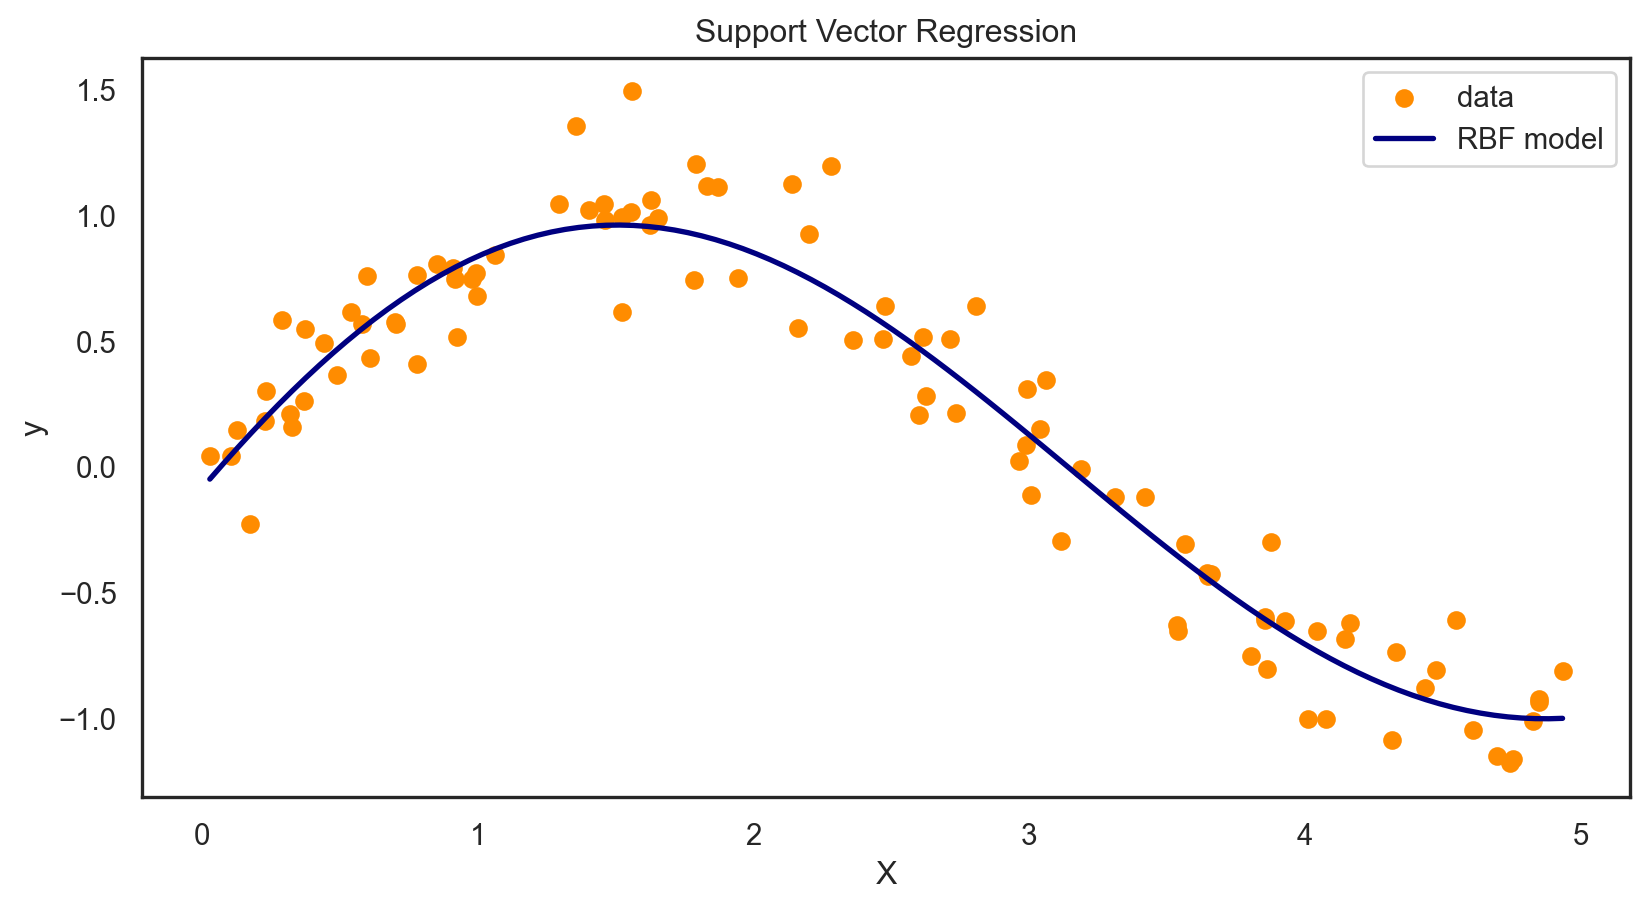

In [13]:
#| echo: false
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Generating synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.2

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Fitting SVR model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_scaled, y_scaled)

# Making predictions
X_plot = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
y_pred = svr_rbf.predict(X_plot)

# Plotting
# Ensure the arrays are reshaped to 2D where needed
plt.scatter(scaler_X.inverse_transform(X_scaled), scaler_y.inverse_transform(y_scaled.reshape(-1, 1)), color='darkorange', label='data')
plt.plot(scaler_X.inverse_transform(X_plot), scaler_y.inverse_transform(y_pred.reshape(-1, 1)), color='navy', lw=2, label='RBF model')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()